In [ ]:
import pandas as pd

file_path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
df = pd.read_excel(file_path)

print(df.head())

   Year  District   River  Affected_People  Flood_Area_Ha  Houses_Damaged  \
0  2020     Buxar   Ganga           145000          18000            4200   
1  2020   Bhojpur   Ganga           168000          21000            5100   
2  2020     Saran   Ganga           192000          24000            5900   
3  2020  Vaishali  Gandak           210000          26000            6400   
4  2020     Patna   Ganga           230000          30000            7200   

   Crop_Area_Damaged_Ha  Fatalities  Relief_Camps  
0                  9000          11            38  
1                 11000          14            44  
2                 12500          17            52  
3                 14000          19            60  
4                 16000          21            75  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
df = pd.read_excel(file_path)

yearly_summary = df.groupby("Year")["Affected_People"].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_summary.index, yearly_summary.values, marker='o', color='blue')
plt.xlabel("Year")
plt.ylabel("Total Affected People")
plt.title("Yearly Flood Affected Population - Bihar")
plt.grid(True)
plt.tight_layout()

output_file = r"F:\PythonL\Data\bihar_flood_yearly.png"
plt.savefig(output_file)
plt.close()

output_file


'F:\\PythonL\\Data\\bihar_flood_yearly.png'

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
data = pd.read_excel(path)

y = data["Flood_Area_Ha"]
X = data.drop("Flood_Area_Ha", axis=1)

categorical_cols = ["District", "River"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Use 5-Fold instead of 10
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")

print("MSE:", -scores)
print("Average MSE:", -scores.mean())
print("RMSE:", (-scores.mean())**0.5)

MSE: [8540466.66666667 1711766.66666667 9836216.66666667 1354962.5
 1247862.5       ]
Average MSE: 4538255.0
RMSE: 2130.3180513716725


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, reg in models.items():
    model = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("regressor", reg)
    ])
    
    scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    print(name, "R2:", scores.mean())

Linear Regression R2: 0.9388962364048032
Decision Tree R2: -4.552020544042359
Random Forest R2: -10.078142546640866


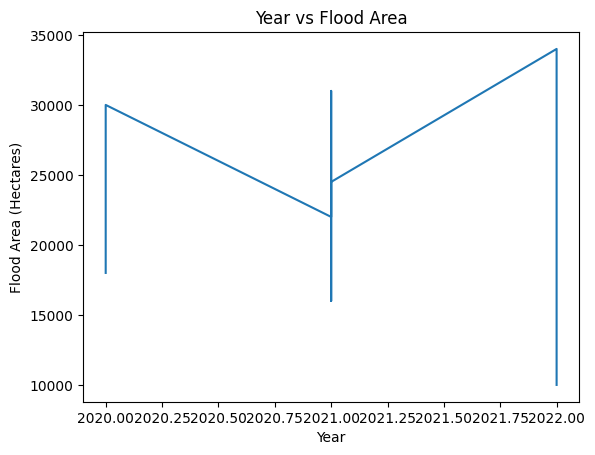

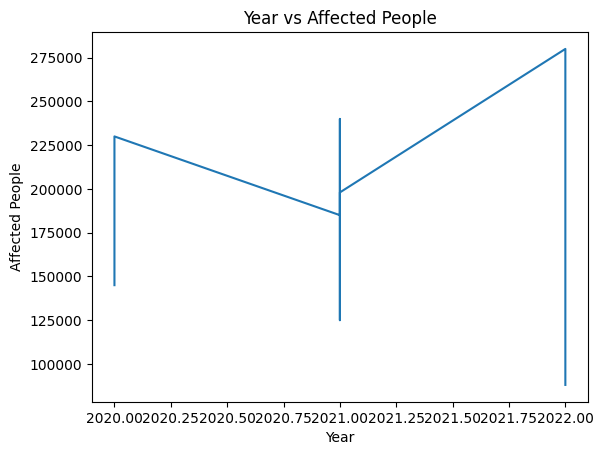

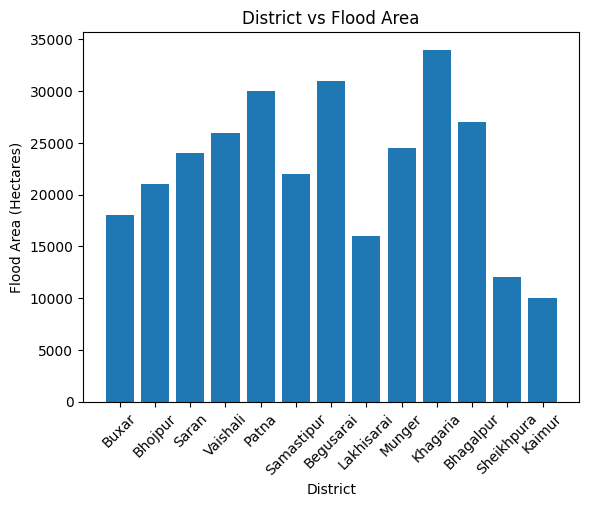

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
data = pd.read_excel(path)

# Year vs Flood Area
plt.figure()
plt.plot(data["Year"], data["Flood_Area_Ha"])
plt.xlabel("Year")
plt.ylabel("Flood Area (Hectares)")
plt.title("Year vs Flood Area")
plt.show()

# Year vs Affected People
plt.figure()
plt.plot(data["Year"], data["Affected_People"])
plt.xlabel("Year")
plt.ylabel("Affected People")
plt.title("Year vs Affected People")
plt.show()

# District vs Flood Area (Bar Chart)
plt.figure()
plt.bar(data["District"], data["Flood_Area_Ha"])
plt.xlabel("District")
plt.ylabel("Flood Area (Hectares)")
plt.title("District vs Flood Area")
plt.xticks(rotation=45)
plt.show()
